In [94]:
import numpy as np
from scipy.linalg import sqrtm
from sklearn.metrics import mutual_info_score
from keras.models import load_model
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
# MacOS matplotlib kernel issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [10]:
def fréchet_inception_distance(image1, image2):
    mean1, stddev1 = np.mean(image1, axis=0), np.cov(image1, rowvar=False)
    mean2, stddev2 = np.mean(image2, axis=0), np.cov(image2, rowvar=False)
    sum_squared_diff_mean = np.sum((mean1 - mean2) ** 2)
    root_prod_cov = sqrtm(stddev1.dot(stddev2))
    
    if np.iscomplexobj(root_prod_cov):
        root_prod_cov = root_prod_cov.real
    
    fid = sum_squared_diff_mean + np.trace(stddev1 + stddev2 - 2. * root_prod_cov)
    return fid

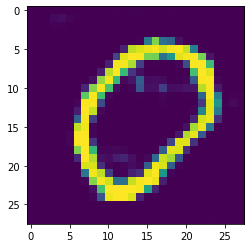

In [77]:
(train_images, train_labels), (_, _) = load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')

generator_model = load_model('./DigitModels/GENmodel_150.h5')
gen_shape = tuple(generator_model.input.get_shape().as_list()[1:])
gen_noise = np.random.normal(loc=0, scale=1, size=(1,)+gen_shape)

created_digit = generator_model.predict(gen_noise)
created_digit = created_digit[0]
denormalized_digit = ((created_digit + 1) * 127.5) / 255
squeezed_digit = denormalized_digit.reshape(28, 28).astype('float32')
plt.imshow(squeezed_digit)

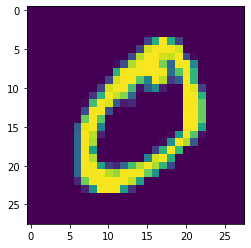

In [78]:
my_digit = 0
train_filter = np.where((train_labels == my_digit ))
train_images = train_images[train_filter]
mnist_image = train_images[0]
squeezed_mnist = mnist_image.reshape(28, 28).astype('float32')
plt.imshow(squeezed_mnist)

In [79]:
fréchet_inception_distance(squeezed_digit, squeezed_mnist)

245541.94606423637

In [92]:
def jsd(image1, image2):
    image1 = image1.flatten()
    image2 = image2.flatten()
    mean = (image1 + image2) / 2
    divergence = (entropy(image1, mean) + entropy(image2, mean)) / 2
    distance = np.sqrt(divergence)
    return distance

In [93]:
jsd(squeezed_digit, squeezed_mnist)

0.9800616935365165

In [91]:
squeezed_digit.flatten().shape

(784,)

In [98]:
mutual_info_score(squeezed_digit.flatten(), squeezed_mnist.flatten())

1.3270247138103315